Bring in all necessary packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [17]:
train = pd.read_csv(r"data/processed/train.csv")

Explore the counts

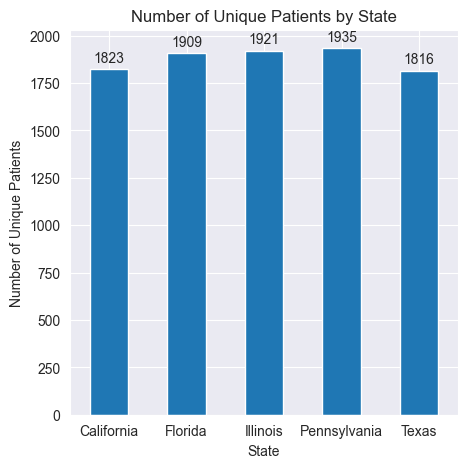

In [18]:
unique_patients_by_state = train.groupby("STATE")["PATIENT"].nunique()
#plot a bar chart
ax = unique_patients_by_state.plot(kind="bar", figsize=(5, 5))
# Customize the plot
plt.title("Number of Unique Patients by State")
plt.xlabel("State")
plt.ylabel("Number of Unique Patients")
plt.xticks(rotation=0)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

In [19]:
states_order = ["Pennsylvania", "Illinois", "Florida", "Texas", "California", "Total"]
def categorical_summary(sub_df, var):
    counts = sub_df[var].value_counts(dropna=False)
    percents = sub_df[var].value_counts(normalize=True, dropna=False) * 100
    summary = counts.astype(str) + " (" + percents.round(1).astype(str) + "%)"
    return summary

def summarize_categorical(var):
    summaries = {}
    for state in ["Pennsylvania", "Illinois", "Florida", "Texas", "California"]:
        sub = train[train["STATE"] == state]
        summaries[state] = categorical_summary(sub, var)
    # Overall summary
    summaries["Total"] = categorical_summary(train, var)

    df_summary = pd.DataFrame(summaries)
    df_summary = df_summary[states_order]
    return df_summary

def summarize_continuous(var):
    # List of stats to include
    stats = ["count", "mean", "median", "std", "min", "max"]
    summary_dict = {}
    for state in ["Pennsylvania", "Illinois", "Florida", "Texas", "California"]:
        sub = train[train["STATE"] == state]
        s = sub[var].describe()
        summary_dict[state] = [sub[var].count(), s["mean"], sub[var].median(), s["std"], s["min"], s["max"]]
    # Overall totals:
    #s_total = patients_all[var].describe()
    summary_dict["Total"] = [train[var].count(), train[var].mean(), train[var].median(),
                             train[var].std(), train[var].min(), train[var].max()]

    df_summary = pd.DataFrame(summary_dict, index=stats)
    df_summary = df_summary[states_order]
    return df_summary

def summarize_death():
    # For DEATHDATE, if there's a death date, count them as dead
    summary = {}
    for state in ["Pennsylvania", "Illinois", "Florida", "Texas", "California"]:
        sub = train[train["STATE"] == state]
        summary[state] = sub["DEATHDATE"].notnull().sum()
    summary["Total"] = train["DEATHDATE"].notnull().sum()
    df_summary = pd.DataFrame(summary, index=["Dead Count"])
    df_summary = df_summary[states_order]
    return df_summary

#Print the tables
print("Marital Status Summary:")
summary_marital = summarize_categorical("MARITAL")
print(summary_marital, "\n")

print("Race Summary:")
summary_race = summarize_categorical("RACE")
print(summary_race, "\n")

print("Ethnicity Summary:")
summary_ethnicity = summarize_categorical("ETHNICITY")
print(summary_ethnicity, "\n")

print("Gender Summary:")
summary_gender = summarize_categorical("GENDER")
print(summary_gender, "\n")

print("Income Summary (Continuous Variable):")
summary_income = summarize_continuous("INCOME")
print(summary_income, "\n")

print("Death (Dead Count) Summary:")
summary_death = summarize_death()
print(summary_death, "\n")


Marital Status Summary:
        Pennsylvania     Illinois      Florida        Texas   California  \
MARITAL                                                                    
M        817 (42.2%)  802 (41.7%)  836 (43.8%)  688 (37.9%)  731 (40.1%)   
0        591 (30.5%)  639 (33.3%)  562 (29.4%)  681 (37.5%)  629 (34.5%)   
S        271 (14.0%)  236 (12.3%)  261 (13.7%)  227 (12.5%)  250 (13.7%)   
D        205 (10.6%)  194 (10.1%)   185 (9.7%)   162 (8.9%)   166 (9.1%)   
W          51 (2.6%)    50 (2.6%)    65 (3.4%)    58 (3.2%)    47 (2.6%)   

                Total  
MARITAL                
M        3874 (41.2%)  
0        3102 (33.0%)  
S        1245 (13.2%)  
D          912 (9.7%)  
W          271 (2.9%)   

Race Summary:
          Pennsylvania      Illinois       Florida         Texas  \
RACE                                                               
asian        66 (3.4%)     94 (4.9%)     38 (2.0%)     80 (4.4%)   
black      229 (11.8%)   288 (15.0%)   321 (16.8%)   21

Response Variable count (230 patients have a TRUE flagged. The rest will be set to False by Default)
That's approximately 2.4%

In [20]:
cvd_table = pd.crosstab(index=train["cvd_flag"], columns="Count")
print(cvd_table)

col_0     Count
cvd_flag       
0          9174
1           230
